In [1]:
#Load libraries
from sklearn.datasets import load_boston
import copy 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [3]:
# Import dataset
df= pd.read_csv('C:/Users/Administrator/Desktop/Sentinel Hulu Perak/sentinel Hulu Perak Mac 2019/Sampel hulu perak/HuluPerak_training.csv', sep=",", decimal='.' )
df.head()

,id,poly_id,point_id,id_2,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,0,0,0,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,1,0,1,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,2,0,2,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,3,0,3,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,4,0,4,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


In [4]:
filters = [(df.id_2 == 1), (df.id_2 == 2), (df.id_2 == 3),(df.id_2 == 4),
           (df.id_2 == 5), (df.id_2 == 6), (df.id_2 == 7)]

values = ["Water Body", "Build up Area", "Rubber", "Palm Oil", "Other vegetation", "Forest", "Bare Land"]   

df ["Class_name"] = np.select(filters, values)
df.drop(['id','poly_id','point_id'],axis=1, inplace=True)
df.rename(columns= {'id_2': 'Class_id'}, inplace=True)
df=df[['Class_name','Class_id','BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']]
df.head()

,Class_name,Class_id,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,Rubber,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,Rubber,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,Rubber,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,Rubber,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,Rubber,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


<AxesSubplot:>

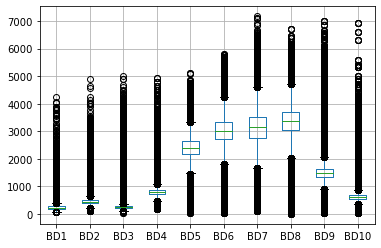

In [8]:
df.boxplot(column= ['BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10'])

In [14]:
dfclass1 = df[(df.Class_id == 1)]
dfclass2 = df[(df.Class_id == 2)]
dfclass3 = df[(df.Class_id == 3)]
dfclass4 = df[(df.Class_id == 4)]
dfclass5 = df[(df.Class_id == 5)]
dfclass6 = df[(df.Class_id == 6)]
dfclass7 = df[(df.Class_id == 7)]

<AxesSubplot:>

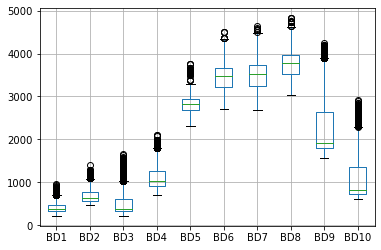

In [15]:
dfclass4.boxplot(column= ['BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10'])

In [46]:
#Mahalonibis Distance

def mahalanobis_method(x=None, data=dfclass4, cov=None):
    #M-Distance
    x_minus_mu = dfclass4 - np.mean(dfclass4)
    cov = np.cov(dfclass4.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), dfclass4=dfclass4.shape[10]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_bi, md_bi = mahalanobis_method(dfclass4_bivariate=dfclass4)

outliers_mahal, md = mahalanobis_method(dfclass4=dfclass4)

TypeError: mahalanobis_method() got an unexpected keyword argument 'dfclass4_bivariate'

In [40]:
dfclass4_bivariate=dfclass4
outliers_mahal_bi, md_bi = mahalanobis_method(dfclass4_bivariate)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [29]:
#Mahalonibis Distance

def mahalanobis_method(dfclass4):
    #M-Distance
    x_minus_mu = dfclass4 - np.mean(dfclass4)
    cov = np.cov(dfclass4.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), dfclass4=dfclass4.shape[10]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_bi, md_bi = mahalanobis_method(dfclass4=dfclass4_bivariate)

#outliers_mahal, md = mahalanobis_method(dfclass4=dfclass4)

NameError: name 'dfclass4_bivariate' is not defined

In [45]:
dfclass4.dtypes


Class_name     object
Class_id      float64
BD1             int64
BD2             int64
BD3             int64
BD4             int64
BD5             int64
BD6             int64
BD7             int64
BD8             int64
BD9             int64
BD10            int64
dtype: object